In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import pearsonr,spearmanr,pointbiserialr

import seaborn as sns
import matplotlib.pyplot as plt
import mantel

# Import data

In [2]:
FAVEE_model=pd.read_csv('output_data/pca_results/Total_scores_var_5c_33d.csv',index_col=0)
FAVEE_model.columns = ['Activeness','Exchange','Formality','Equality','Valence']
FAVEE_model = FAVEE_model.loc[:,['Formality','Activeness','Valence','Exchange','Equality']]
FAVEE_model['Activeness'] = -FAVEE_model['Activeness']
FAVEE_model['Formality'] = -FAVEE_model['Formality']
FAVEE_model['Valence'] = -FAVEE_model['Valence']
FAVEE_model_rdm= pd.DataFrame(euclidean_distances(FAVEE_model),index=FAVEE_model.index,columns=FAVEE_model.index)


FAVEE_FV_model = FAVEE_model[['Formality','Valence']]
FAVEE_FV_model_rdm= pd.DataFrame(euclidean_distances(FAVEE_FV_model),index=FAVEE_FV_model.index,columns=FAVEE_FV_model.index)

In [3]:
FV_model=pd.read_csv('output_data/pca_results/Total_scores_var_2c_33d.csv',index_col=0)
FV_model.columns = ['Formality','Valence']
FV_model['Valence'] = -FV_model['Valence']
FV_model_rdm= pd.DataFrame(euclidean_distances(FV_model),index=FV_model.index,columns=FV_model.index)

In [4]:
HPP_model=pd.read_csv('output_data/categorical_model/total_raw33d_dissim_3k.csv',index_col=0)
HPP_model_rdm=pd.read_csv('output_data/categorical_model/rdm_total_raw33d_dissim_3k.csv',index_col=0) 

# Heatmap

Text(0.5, 1.0, 'HPP')

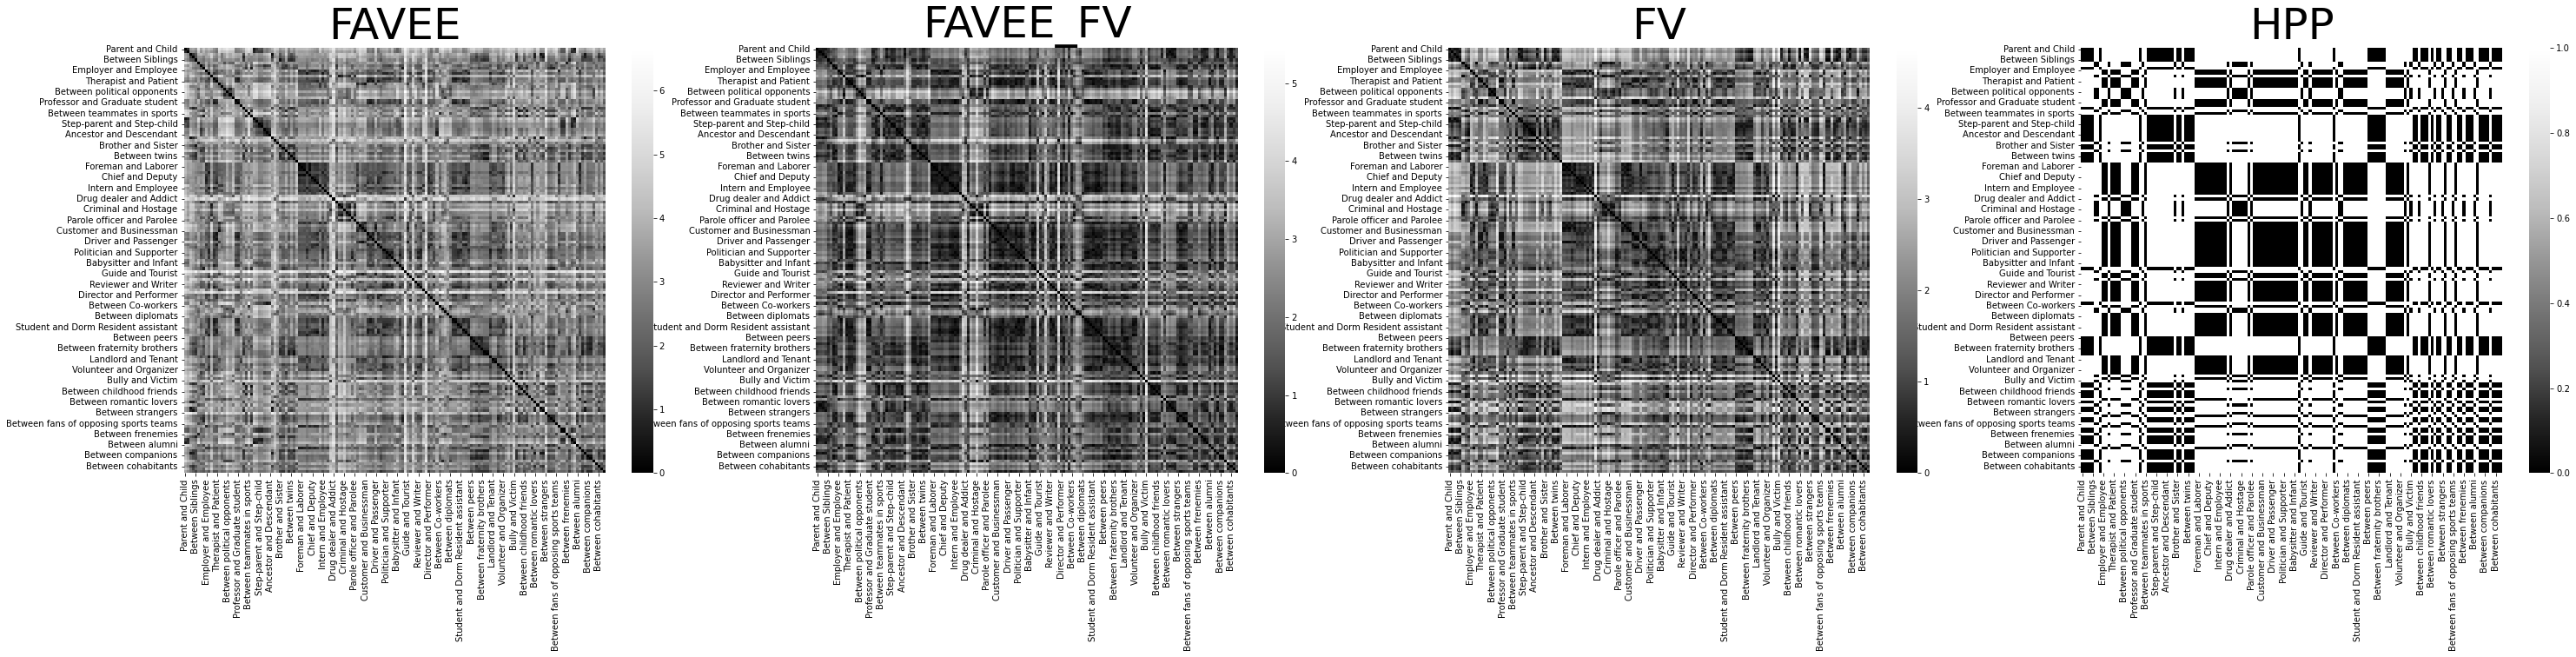

In [5]:
fig, axes = plt.subplots(figsize=(50,9),nrows=1, ncols=4)
sns.heatmap(FAVEE_model_rdm,ax=axes[0],cmap = 'Greys_r')
axes[0].set_title('FAVEE',size=50)
sns.heatmap(FAVEE_FV_model_rdm,ax=axes[1],cmap = 'Greys_r')
axes[1].set_title('FAVEE_FV',size=50)
sns.heatmap(FV_model_rdm,ax=axes[2],cmap = 'Greys_r')
axes[2].set_title('FV',size=50)
sns.heatmap(HPP_model_rdm,ax=axes[3],cmap = 'Greys_r')
axes[3].set_title('HPP',size=50)

# Correlation

The correlation between **HPP** and **FAVEE** or **FV filtered from FAVEE** is around 0.4.  
Interestingly, **FV directly derived from PCA** correlated higher with **HPP**, that is around 0.7.

In [6]:
def rdmtoarray(rdm):
    rdm_array = np.array(rdm)[np.triu_indices(159,k=1)]
    return rdm_array
FAVEE_model_array = rdmtoarray(FAVEE_model_rdm)
FAVEE_FV_model_array = rdmtoarray(FAVEE_FV_model_rdm)
FV_model_array = rdmtoarray(FV_model_rdm)
HPP_model_array = rdmtoarray(HPP_model_rdm)

In [7]:
print('FAVEE ~ HPP')
print('pearson:{}'.format(mantel.test(FAVEE_model_array, HPP_model_array, 
                                      perms=10000, method='pearson', tail='two-tail')))
print('spearman:{}'.format(mantel.test(FAVEE_model_array, HPP_model_array, 
                                      perms=10000, method='spearman', tail='two-tail')))
print('######################################################################')

print('FV(filtered from FAVEE) ~ HPP')
print('pearson:{}'.format(mantel.test(FAVEE_FV_model_array, HPP_model_array, 
                                      perms=10000, method='pearson', tail='two-tail')))
print('spearman:{}'.format(mantel.test(FAVEE_FV_model_array, HPP_model_array, 
                                      perms=10000, method='spearman', tail='two-tail')))
print('######################################################################')

print('FV(derived from 2 dimensions using PCA ) ~ HPP')
print('pearson:{}'.format(mantel.test(FV_model_array, HPP_model_array, 
                                      perms=10000, method='pearson', tail='two-tail')))
print('spearman:{}'.format(mantel.test(FV_model_array, HPP_model_array, 
                                      perms=10000, method='spearman', tail='two-tail')))

FAVEE ~ HPP
pearson:MantelResult(0.44223704976827266, 0.0001, 24.43273852007024)
spearman:MantelResult(0.44660969015474705, 0.0001, 25.31580181760738)
######################################################################
FV(filtered from FAVEE) ~ HPP
pearson:MantelResult(0.4083264127761159, 0.0001, 22.451319188889823)
spearman:MantelResult(0.4476922282494735, 0.0001, 25.51423229632922)
######################################################################
FV(derived from 2 dimensions using PCA ) ~ HPP
pearson:MantelResult(0.6735218810826464, 0.0001, 40.358985056414255)
spearman:MantelResult(0.7018231325013697, 0.0001, 44.05073577713957)


In [6]:
def corr(rdm1,rdm2,method):
    rdm1_array = np.array(rdm1)[np.triu_indices(159,k=1)]
    rdm2_array = np.array(rdm2)[np.triu_indices(159,k=1)]
    
    if method == 'pearson':
        values = pearsonr(rdm1_array,rdm2_array)
    
    if method == 'spearman':
        values = spearmanr(rdm1_array,rdm2_array)
        
    if method == 'pointbiserial':
        values = pointbiserialr(rdm1_array,rdm2_array)
    
    return values

## FAVEE ~ HPP

In [7]:
print('pearson:{}'.format(corr(FAVEE_model_rdm,HPP_model_rdm,method='pearson')))
print('spearman:{}'.format(corr(FAVEE_model_rdm,HPP_model_rdm,method='spearman')))
print('pointbiserial:{}'.format(corr(FAVEE_model_rdm,HPP_model_rdm,method='pointbiserial')))

pearson:(0.4422370497682907, 0.0)
spearman:SpearmanrResult(correlation=0.4466096901547471, pvalue=0.0)
pointbiserial:PointbiserialrResult(correlation=0.4422370497682907, pvalue=0.0)


## FV(filtered from FAVEE) ~ HPP

In [8]:
print('pearson:{}'.format(corr(FAVEE_FV_model_rdm,HPP_model_rdm,method='pearson')))
print('spearman:{}'.format(corr(FAVEE_FV_model_rdm,HPP_model_rdm,method='spearman')))
print('pointbiserial:{}'.format(corr(FAVEE_FV_model_rdm,HPP_model_rdm,method='pointbiserial')))

pearson:(0.4083264127761317, 0.0)
spearman:SpearmanrResult(correlation=0.4476922282494736, pvalue=0.0)
pointbiserial:PointbiserialrResult(correlation=0.4083264127761317, pvalue=0.0)


## FV(derived from 2 dimensions using PCA ) ~ HPP

In [9]:
print('pearson:{}'.format(corr(FV_model_rdm,HPP_model_rdm,method='pearson')))
print('spearman:{}'.format(corr(FV_model_rdm,HPP_model_rdm,method='spearman')))
print('pointbiserial:{}'.format(corr(FV_model_rdm,HPP_model_rdm,method='pointbiserial')))

pearson:(0.6735218810826712, 0.0)
spearman:SpearmanrResult(correlation=0.7018231325013697, pvalue=0.0)
pointbiserial:PointbiserialrResult(correlation=0.6735218810826712, pvalue=0.0)
